<a href="https://colab.research.google.com/github/GustavBakhauge/FYP2/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/GustavBakhauge/FYP2 #Clone the repo
import pandas as pd
import matplotlib as plt 
import numpy as np
import altair as alt
import seaborn as sns

fatal: destination path 'FYP2' already exists and is not an empty directory.


In [0]:
deaths_data = pd.read_csv("FYP2/Corona_deaths.csv")
inf_data = pd.read_csv("FYP2/Corona_infections.csv")
rec_data = pd.read_csv("FYP2/Corona_recovered.csv")

In [0]:
BB = (deaths_data.Lat.min(),deaths_data.Lat.max(), deaths_data.Long.min(), deaths_data.Long.max())

In [0]:
inf_numbers = inf_data.drop(["Lat", "Long", "Province/State", "Country/Region"], axis=1)
rec_numbers = rec_data.drop(["Lat", "Long", "Province/State", "Country/Region"], axis=1)
deaths_numbers = deaths_data.drop(["Lat", "Long", "Province/State", "Country/Region"], axis=1)

In [0]:
inf_numbers = inf_data.drop(["Lat", "Long", "Province/State", "Country/Region"], axis=1)

In [0]:
#creating list for numbers. Maybe do list comprehension.
dictionary = {"Date": [], "Infected": [], "Recovered": [], "Deaths": []}
for name, number in inf_numbers.iteritems():
  dictionary["Infected"].append(sum(number))
for name, number in rec_numbers.iteritems():
  dictionary["Recovered"].append(sum(number))
for name, number in deaths_numbers.iteritems():
  dictionary["Deaths"].append(sum(number))
  dictionary["Date"].append(str(name))


In [0]:
#Create panda dateframe
df = pd.DataFrame(dictionary)
dates = pd.to_datetime(df["Date"])

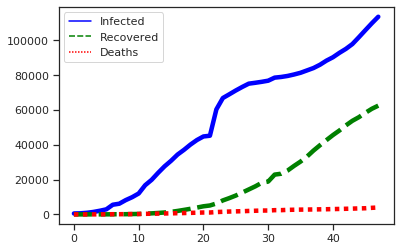

In [8]:
sns.set(style="ticks")
data = df.rolling(1).mean()
sns.lineplot(data=data, palette=["blue", "green", "red"], linewidth=4.5,markers=None)

In [9]:

alt.Chart(df).mark_point().encode(x="Date",y="Status")

ValueError: ignored

alt.Chart(...)

In [22]:
alt.Chart(df).transform_fold(
    ['Infected', 'Recovered', 'Deaths'],
    as_=['Index', 'Population']
).mark_line().encode(
    x='Date:T',
    y='Population:Q',
    color='Index:N')

alt.Chart(...)

In [10]:
print(df)


         Date  Infected  Recovered  Deaths
0   1/22/2020       555         28      17
1   1/23/2020       653         30      18
2   1/24/2020       941         36      26
3   1/25/2020      1434         39      42
4   1/26/2020      2118         52      56
5   1/27/2020      2927         61      82
6   1/28/2020      5578        107     131
7   1/29/2020      6166        126     133
8   1/30/2020      8234        143     171
9   1/31/2020      9927        222     213
10   2/1/2020     12038        284     259
11   2/2/2020     16787        472     362
12   2/3/2020     19881        623     426
13   2/4/2020     23892        852     492
14   2/5/2020     27636       1124     564
15   2/6/2020     30818       1487     634
16   2/7/2020     34392       2011     719
17   2/8/2020     37121       2616     806
18   2/9/2020     40151       3244     906
19  2/10/2020     42763       3946    1013
20  2/11/2020     44803       4683    1113
21  2/12/2020     45222       5150    1118
22  2/13/20